# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Santiago Ramirez Saldana

Datum: 17/11/2023

Gruppe: 37

# Kalorimetrie Küchentischversuch - Newtonsches Abkühlungsgesetz
Author: Santiago Ramirez Saldana

Datum: 17/11/2023

Gruppe: 37

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Kann das Newtonsche Abkühlungsgesetz durch die Messung 
der Temperaturdifferenz zwischen einem Getränk und seiner 
Umgebung über einen Zeitraum von etwa 10 Minuten bestätigt werden, 
indem der Logarithmus dieser Temperaturdifferenz 
über der Zeit aufgetragen und der Transportkoeffizient bestimmt wird?



## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


![Newton.jpg](figures/Newton.jpg)

Der Versuch wurde gemäß den Anweisungen der Aufgabenstellung an meinem Schreibtisch durchgeführt.Die für das Experiment benötigten Gegenstände sind eine Schale mit Wasser für das T-Stück und Sensoren zur Messung der Wassertemperatur. Zu Beginn des Experiments wird das Wasser erhitzt und der Beutel mit dem T-Stück in das Wasser gelegt. Nach einer Minute wird der Sensor in das Wasser gehalten und die Wassertemperatur in Echtzeit gemessen. Nach etwa 10 Minuten ist das Experiment beendet und die Daten werden in einem HDF5-Datensatz gespeichert.

## Versuchsauswertung

In [8]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Newtonsches Abkühlungsgesetz

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen

Messdaten werden in das Notebook eingelesen.

In [13]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.
path = '/home/jovyan/work/calorimetry_home/archiv/Newton_Experiment/Newton_Experiment.h5'
import h5py as h5
# DONE #

In [14]:
# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.
# HINT: You can find information about how to access to H5 Files in the README of your Repo.


dataset = h5.File(path, "r")

author = dataset.attrs["authors"]
created = dataset.attrs["created"]
experiment = dataset.attrs["experiment"]
group_number= dataset.attrs["group_number"]

keys = list(dataset['RawData'].keys())
print(keys)
temperature_1 = dataset['RawData'][keys[0]]['temperature'][()]
print(temperature_1)
temperature_2 = dataset['RawData'][keys[1]]['temperature'][()]
print(temperature_2)
timestamp_1 = dataset['RawData'][keys[0]]['timestamp'][()]
timestamp_2 = dataset['RawData'][keys[1]]['timestamp'][()]
print(timestamp_1)
print(timestamp_2)

# DONE #

['1ee7d8b5-89ef-698d-b53c-47a54e651099', '1ee7d8cb-01f3-6155-bf64-7d793842269d']
[23.5    23.1875 23.125  23.125  23.0625 23.     22.9375 22.9375 22.875
 22.875  22.875  22.875  22.75   22.75   22.6875 22.6875 22.625  22.625
 22.625  22.5625 22.5625 22.5    22.5625 22.5    22.5    22.4375 22.4375
 22.4375 22.375  22.375  22.375  22.3125 22.3125 22.3125 22.25   22.25
 22.25   22.25   22.25   22.25   22.1875 22.1875 22.125  22.125  22.125
 22.0625 22.0625 22.0625 22.     22.     22.     22.     22.     21.9375
 21.9375 21.9375 21.9375 21.9375 21.875  21.875  21.8125 21.8125 21.8125
 21.8125 21.8125 21.8125 21.8125 21.8125 21.6875 21.6875 21.6875 21.6875
 21.6875 21.6875 21.6875 21.6875 21.6875 21.6875 21.625  21.625  21.625
 21.625  21.625  21.625  21.5625 21.5625 21.5625 21.5625 21.5625 21.5625
 21.5    21.5    21.5    21.4375 21.4375 21.5    21.4375 21.4375 21.4375
 21.4375 21.375  21.375  21.375  21.375  21.375  21.375  21.375  21.375
 21.375  21.375  21.375  21.375  21.375  21.3125 2

#### (ii) Daten Semi–log ploten

Die Zeit und Differenz zwischen der heißen Flüssigkeit und der Umgebungstemperatur wird aufgezeichnet.

Die y-Achse (Temperaturdifferenz) ist auf logarithmisch eingestellt und die x-Achse (Zeit) verwendet eine normale Skalierung.

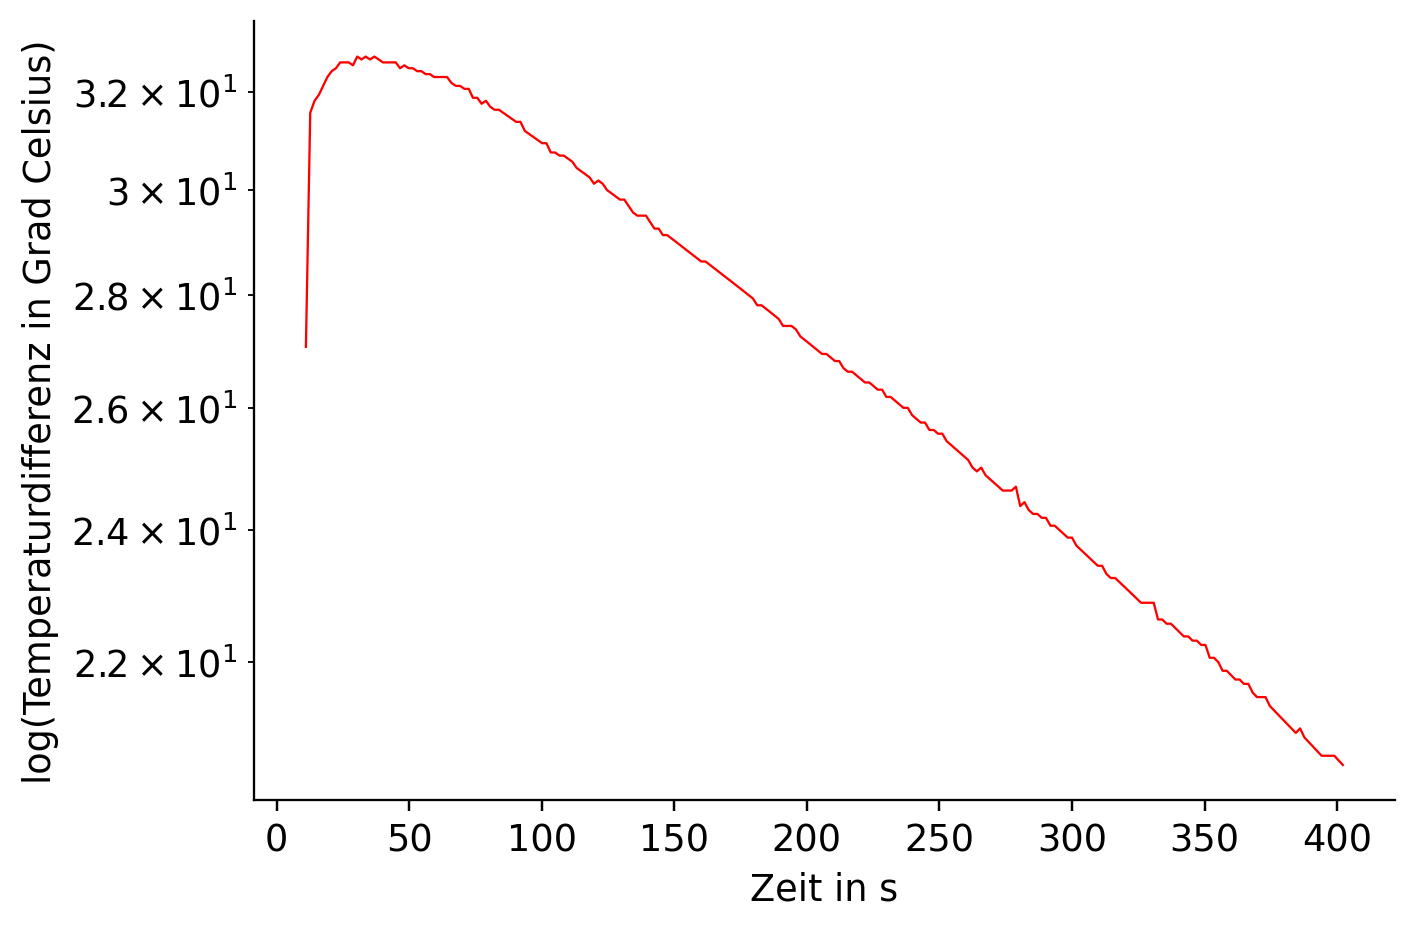

In [16]:
# TODO: Use the temperature and time data for plotting
temperature_diff = temperature_2 - temperature_1

fig, ax = plt.subplots()
ax.plot(timestamp_1, temperature_diff,color = 'red')
ax.set_xlabel("Zeit in s")
ax.set_ylabel("log(Temperaturdifferenz in Grad Celsius)")
ax.set_yscale("log")

# DONE #

#### (iii) Koeffizient in Newtonschem Abkühlungsgesetz
Die `numpy.polyfit` Funktion ist zu verwenden, um den Koeffizienten $K$ zu bestimmen.
$$
T(t) - T_2 = (T_1 - T_2)e^{Kt}
$$
Dabei ist $T(t) - T_2$ der Verlauf der Temperaturdifferenz. Die Anfangstemperatur ist $T_1$, die Endtemperatur ist $T_2$.

In [19]:
# TODO: Determine coefficient in Newtonschen Abkühlungsgesetz
T_1 = max(temperature_1)
T_2 = temperature_1[-1]
T_diff = temperature_diff

alpha, beta = np.polyfit(timestamp_1, np.log(T_diff), 1)
K = beta

# DONE #

#### (iV) Ergebnis

In [20]:
# TODO: Print result
print('Der Transportkoeffizient beträgt', K)

# DONE #

Der Transportkoeffizient beträgt 3.5452164767673273


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.
Können Sie das Newtonsche Abkühlungsgesetz bestätigen?

Das Diagramm zeigt eine exponentielle Abnahme der Temperatur. 
Dies beweist, dass es eine Beziehung zwischen der Abkühlungsrate und 
der Temperaturdifferenz zwischen der Umgebungstemperatur und der Wassertemperatur gibt. 
Dies beweist also das Newtonsche Gesetz der Abkühlung und beantwortet die Forschungsfrage.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Nach dem Experiment habe ich gelernt,
dass das Newtonsche Abkühlungsgesetz sicherlich eine Formel ist, 
uf die man sich mit großem Vertrauen verlassen kann.
Das macht es für die zukünftige Forschung gültig.